<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>Detec&ccedil;&atilde;o automatizada de Fake News</strong></h1>
<h1 style="text-align: center;"><strong>e o problema da linguagem ofensiva</strong></h1>
<h1 style="text-align: center;"><strong>e &oacute;dio</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p>

</p><h4 style="text-align: center;"><strong>Proposta de Tema para Trabalho de Conclusão do Curso de Especialização em Ciência de Dados.</strong></h4>

</p><h3 style="text-align: center;"><strong>Faculdade de Engenharia de Sorocaba</strong></h3>

Proposto por:

Alex Cozer Abrantes RA:183150

Bruno Alves Comitre RA:183141

***

# Glossário

<ul>
    <li><a href='#analise_exploratoria'>1. Análise Explorátoria</a></li>
    <ul>
        <li><a href='#imports'>1.1 Imports</a></li>
        <li><a href='#leitura_dataset'>1.2 Leitura do Dataset</a></li>
        <li><a href='#classificacao_features'>1.3 Classificação das Features</a></li>
        <li><a href='#dicionario_dados'>1.4 Dicionário dos Dados</a></li>
        <li><a href='#analise_dados'>1.5 Análise dos Dados</a></li>
        <li><a href='#dados_faltantes'>1.6 Dados Faltantes</a></li>
        <li><a href='#dados_desiquilibrados'>1.7 Dados Desiquilibrados e Random Shuffle</a></li>
        <li><a href='#novas_features'>1.8 Novas Features</a></li>
        <li><a href='#analise_grafica'>1.9 Análise Gráfica</a></li>
        <ul>
            <li><a href='#wordcloud'>1.9.1 WordCloud</a></li>
            <li><a href='#histograma'>1.9.2 Histograma</a></li>
            <ul>
                <li><a href='#histo_titulo'>1.9.2.1 Histograma dos Títulos</a></li>
                <li><a href='#histo_texto'>1.9.2.2 Histograma dos Textos</a></li>
            </ul>
        </ul>
    </ul>
</ul>    

<a id='analise_exploratoria'></a>
# 1. Análise Explorátoria:

Nesta fase do trabalho, inicialmente, faz necessário a aplicação de técnicas para manusear valores faltantes e fazer transformações de variáveis. Os dados serão ajustados e estreitando os presupostos para empregar técnicas gráficas e quantitativas, visando maximizar a obtenção de informações, tendências e detectação decomportamentos.

<a id='imports'></a>
### 1.1 Imports

In [80]:
import numpy as np
import pandas as pd
import csv

import random 
import pandas_profiling #conda install -c conda-forge pandas-profiling
import names #pip install names

<a id='leitura_dataset'></a>
### 1.2 Leitura do Dataset

In [81]:
# Train Dataset
## arquivo disponivel em: https://drive.google.com/drive/folders/1LqNzxY8l0EgznlCD-g873VD-ys1BRN2-?fbclid=IwAR3PPLu4hgNdKfQDJzrLGwV6L42Vm3xBrrcquuCOR4ySS97bVvU46JDaR2s
train_data = pd.read_csv('../input/train.csv')
train_data = train_data.sample(frac = 1) # Randomly Smaple data, ratio is 100%
train_data.head()

,id,title,author,text,label
773,773,Donald Trump Threatens to Cancel Berkeley Fede...,Charlie Spiering,President Donald Trump reacted to the massive ...,0
11616,11616,"Flagged Two Times in 2014, Ahmad Rahami Passed...","Marc Santora, Rukmini Callimachi and Adam Goldman",When Ahmad Khan Rahami returned in March 2014 ...,0
11359,11359,"After Barring Girls for Leggings, United Airli...",Liam Stack,United Airlines barred two teenage girls from ...,0
12731,12731,Students Busted for Allegedly Painting Trump G...,Lana Shadwick,"HOUSTON, Texas — Two Rice University have b...",0
15479,15479,ROBOPOCALYPSE: The Coming Leftist Panic on The...,Allum Bokhari,“They’re taking our jobs! They’re taking our j...,0


<a id='classificacao_features'></a>
### 1.3 Classificação das Features

In [82]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
### 1.4 Dicionário dos dados

O Dataset "fake news" contém as seguintes informações:


- **ID:** id único da notícia


- **TITLE:** título da notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto da notícia


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='analise_dados'></a>
### 1.5 Análise dos dados

Ao importar os dados, é importante entender e identificar o intervalo de preditores específicos, identificar o tipo de dados de cada preditor, bem como calcular o número ou a porcentagem de valores omissos para cada preditor. Usaremos a biblioteca pandas_profiling, que fornece muitas funções extremamente úteis para a análise exploratória de dados.

In [83]:
#profile = pandas_profiling.ProfileReport(train_data)
#display(profile)

<a id='dados_faltantes'></a>
### 1.6 Dados Faltantes

A falta de dados pode afetar a análise e o treinamento, que poderá levar a falhas no aprendizado. Então, é possível dizer se há dados ausentes no conjunto de dados? Sim, pelo relatório gerado por pandas_profiting, identificou-se:

O título do atributo tem 558 amostras (2,68%) com valores ausentes.
O autor do atributo possui 1957 amostras (9,41%) com valores ausentes.
O texto do atributo tem 39 amostras (0,19%) com valores ausentes.

Como existe dados faltantes nas 3 features do dataset (title, Author e Text) eliminar as linhas em que há dados ausentes neste caso é a melhor opção para não comprometer a análise e o treimento.

In [84]:
print('Antes do dropna tínhamos {} registros'.format(train_data.shape[0]))
train_data.dropna(inplace=True)
print('Depois do dropna temos {} registro'.format(train_data.shape[0]))

Antes do dropna tínhamos 20800 registros
Depois do dropna temos 18285 registro


<a id='dados_desiquilibrados'></a>
### 1.7 Dados Desiquilibrados e Random Shuflle

Após eliminar as linhas de dados faltantes, aplicou-se uma análise descritiva para verificar se houve desequilíbrio nos dados, constatou-se que a média de 43% da feature Label, na qual armazena valores de 0 ou 1 (não confiáveis e confiáveis) mostra que os dados estão em desequilibrio, constando uma diferença de 2437 registros com o valor 1 (confiáveis) a mais que o valor 0 (não confiáveis). Para manter o conjunto de dados equilibrado aplicou-se o Random Shuffle nos registros com valor 1 (confiáveis) considerando o valor de 7924 registros que é o número total de dados (não confiáveis). 

In [85]:
train_data.label.describe()

count    18285.000000
mean         0.433361
std          0.495553
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [86]:
unreliable = train_data[train_data['label'] == 1]
print('Não confiável：', len(unreliable))

reliable = train_data[train_data['label'] == 0]
print('Confiável：', len(reliable))

print('Desequilibrio nos dados de {} registros confiáveis'.format(len(reliable) - len(unreliable)))

Não confiável： 7924
Confiável： 10361
Desequilibrio nos dados de 2437 registros confiáveis


In [87]:
## aplicando Random Shuffle
mean = min(len(unreliable), len(reliable))

un_data = unreliable.sample(n = mean)
print('Não confiável：', len(un_data))
r_data = reliable.sample(n = mean)
print('Confiável：', len(r_data))

train_data = pd.concat([un_data, r_data])

Não confiável： 7924
Confiável： 7924


<a id='novas_features'></a>
### 1.8 Novas Features

Por fim, após os tratamentos dos dados, identificou-se a necessidade de criar duas feateares, que armazenarão os dados de:

* Tamanho Titulo (title)
* Tamanho Autor (author)
* Tamanho Texto (text)
* Concatenação do Título + Autor + Texto
* Tamanho da Concatenação do Título + Autor + Texto

Essas novas features serão utilizadas nas análises gráficas e no treinamento dos dados em Keras.

In [88]:
train_data['len_title'] = [len(x) for x in train_data['title']]
train_data['len_author'] = [len(x) for x in train_data['author']]
train_data['len_text'] = [len(x) for x in train_data['text']]
train_data['title_author_text'] = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']
train_data['len_title_author_text'] = [len(x) for x in train_data['title_author_text']]

Com as informações de titulo, autor e texto concatenada, ao aplicar uma análise descritiva observa-se dados importantes como:

* A média das strings
* A existência de pequenos textos
* Os quartis do tamanho das strings

In [89]:
detail = train_data['len_title_author_text'].describe()
print(detail)

count     15848.000000
mean       4818.686017
std        5380.497604
min          23.000000
25%        1837.000000
50%        3618.500000
75%        6503.500000
max      143053.000000
Name: len_title_author_text, dtype: float64


<a id='novas_features'></a>
### 1.9 Análise Gráfica

<ul>
    <li>Gerar um WordCloud com todos os textos</li>
    <li>Será que existe diferença de tamanho (caracteres) dos textos confiáveis e não confiáveis?</li>
    <li>Podemos verificar alguma correlação Tamanho x Avaliação?</li>
    <li>A forma de escrita do texto (exemplos: educado, rude, gírias, etc…) tem influência no sentimento Confiável e Não Confiável?</li>
    <li>Criar um histograma referente ao tamanho dos texto</li>
</ul>

<a id='wordcloud'></a>
#### 1.9.1 WordCloud

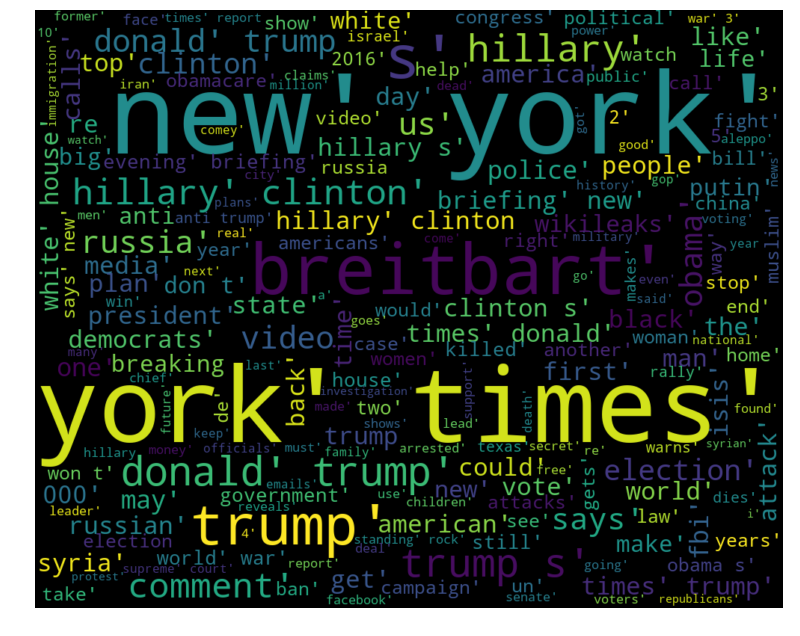

In [90]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Carregando a lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

## words referente a feature title
words = []
for t in train_data.title:
    for p in t.lower().split():
        if p not in stopwords:
            words.append(p)
            
words = str(words)
            
## parametro do wordcloud
wordcloud = WordCloud(width=1000, height=800, margin=0)
wordcloud.generate(words)
    
## plotagem
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
            

<a id='histograma'></a>
#### 1.9.2 Histograma

<p>A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Neste estudo utiliza-se a frequência absoluta, que é o número que representa a quantidade de dados em uma determinada amostra ou o intervalo de classe especifico, indicando a frequência (absoluta) com que uma classe aparece no conjunto de dados.</p>
<p>A seguir, os gráficos abaixo representam os histogramas de Títulos e Textos. Estes gráficos facilitam no entendimento e na analise da existência de influência na avaliação: Confiável ou Não Confiável.</p>



In [115]:
unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

<a id='histo_titulos'></a>
#### 1.9.2.1 Histograma dos Títulos

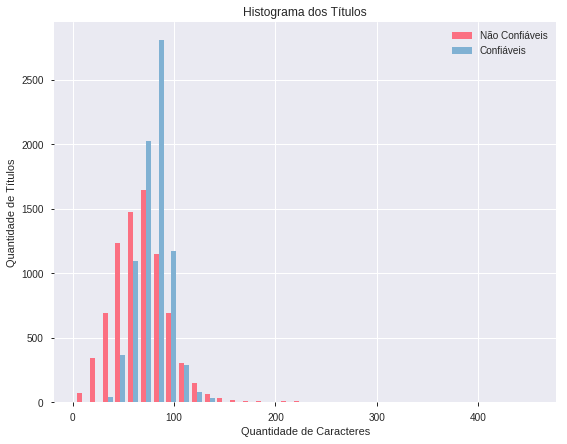

In [137]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_title,reliable.len_title], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma dos Títulos')
plt.legend()

<a id='histo_textos'></a>
#### 1.9.2.2 Histograma dos Textos

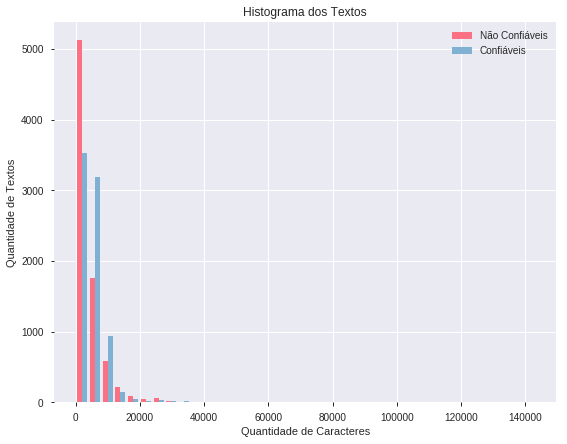

In [135]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.len_text,reliable.len_text], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma dos Textos')
plt.legend()